### Using Focus Measures to Filter Out Blurry Images
Brenner's focus measure is a sharpness or focus measure used in image processing to assess the clarity or focus of an image. It is particularly useful for quantifying the sharpness of an image, making it valuable in autofocus algorithms, image quality assessment, and computer vision tasks.

In this demo, we'll implement multiple variations of Brenner's focus measure and then analyze which method is most useful for the [GoPro dataset](https://paperswithcode.com/dataset/gopro).

The first variation we'll implement is the original, which sums the squares of the horizontal first derivative, which is a complicated way to say it measures the difference in brightness between neighboring pixels in the horizontal direction. 

In [2]:

import numpy as np
from PIL import Image

def get_brenners_focus_horizontal_derivative(pil_image: Image.Image) -> float:
    """
    Calculate Brenner's focus measure to assess the sharpness of a given image.
    Variation 1 of Brenner's focus measure

    Args:
        pil_image (Image.Image): A PIL Image object to be analyzed.

    Returns:
        float: Brenner's focus measure for the image.
    """
    
    # Ensure the input image is in grayscale mode ('L' mode)
    if pil_image.mode != 'L':
        pil_image = pil_image.convert('L')

    # Convert the PIL image to a NumPy array for efficient processing
    image = np.array(pil_image)

    # Compute the difference between adjacent pixels along the vertical axis (axis=0)
    diff = np.diff(image, axis=1)

    # Calculate Brenner's focus measure by summing the squares of the differences
    focus_measure = np.sum(diff**2)

    return focus_measure

The second variation is very similar to the original, however instead of measuring the difference between pixels in the horizontal direction, the derivative is taken in the vertical direction. 

In [3]:
def get_brenners_focus_vert_derivative(pil_image: Image.Image) -> float:
    """
    Calculate Brenner's focus measure to assess the sharpness of a given image.
    Variation 2 of Brenner's focus measure
    Args:
        pil_image (Image.Image): A PIL Image object to be analyzed.

    Returns:
        float: Brenner's focus measure for the image.
    """
    
    # Ensure the input image is in grayscale mode ('L' mode)
    if pil_image.mode != 'L':
        pil_image = pil_image.convert('L')

    # Convert the PIL image to a NumPy array for efficient processing
    image = np.array(pil_image)

    # Compute the difference between adjacent pixels along the vertical axis (axis=0)
    diff = np.diff(image, axis=0)

    # Calculate Brenner's focus measure by summing the squares of the differences
    focus_measure = np.sum(diff**2)

    return focus_measure


For the third variation, instead of simply taking difference between adjacent pixels, the horizontal gradient of the entire image is calculated. This method is more sophisticated and robust than the original Brenner focus measure because it can better handle subtle changes in intensity and is less sensitive to noise.

In [4]:
def get_brenners_focus_horizontal_gradient(pil_image: Image.Image) -> float:
    """
    Calculate Brenner's focus measure to assess the sharpness of a given image.
    Variation 3 of Brenner's focus measure

    Args:
        pil_image (Image.Image): A PIL Image object to be analyzed.

    Returns:
        float: Brenner's focus measure for the image.
    """
    
    # Ensure the input image is in grayscale mode ('L' mode)
    if pil_image.mode != 'L':
        pil_image = pil_image.convert('L')

    # Convert the PIL image to a NumPy array for efficient processing
    image = np.array(pil_image)

    # Gradient in the horizontal direction
    grad_x = np.gradient(image, axis=1)  

    # Sum of squares of horizontal gradient
    focus_measure = np.sum(grad_x**2)

    return focus_measure

The forth variant we'll implement is similar to the third variation, however it will instead use the vertical gradient.

In [5]:
def get_brenners_focus_vert_gradient(pil_image: Image.Image) -> float:
    """
    Calculate Brenner's focus measure to assess the sharpness of a given image.
    Variation 4 of Brenner's focus measure

    Args:
        pil_image (Image.Image): A PIL Image object to be analyzed.

    Returns:
        float: Brenner's focus measure for the image.
    """
    
    # Ensure the input image is in grayscale mode ('L' mode)
    if pil_image.mode != 'L':
        pil_image = pil_image.convert('L')

    # Convert the PIL image to a NumPy array for efficient processing
    image = np.array(pil_image)

    # Gradient in the vertical direction
    grad_x = np.gradient(image, axis=0)  

    # Sum of squares of vertical gradient
    focus_measure = np.sum(grad_x**2)

    return focus_measure

The fifth and final variant we'll look at is a color variant. If you look in the four implementations above, the first step of each function is to convert the given image to grayscale mode. 

In [6]:

def get_brenners_focus_color(pil_image: Image.Image) -> float:
    """
    Calculate Brenner's focus measure for a color image by applying the measure
    to each color channel (R, G, B) and then averaging the focus measure values.

    Args:
        pil_image (Image.Image): A PIL Image object to be analyzed.

    Returns:
        float: Brenner's focus measure for the image.
    """
    
    # Convert the PIL image to a NumPy array
    image = np.array(pil_image)
    
    # Split the image into its R, G, B channels
    if image.ndim == 3:  # Check if it's a color image
        red_channel = image[:, :, 0]
        green_channel = image[:, :, 1]
        blue_channel = image[:, :, 2]
    else:
        raise ValueError("Input image must be a color image with 3 channels.")

    # Define a helper function to compute Brenner's focus measure for a single channel
    def brenner_focus_single_channel(channel):
        grad_x = np.roll(channel, -2, axis=1) - channel  # Horizontal shift by 2 pixels
        focus_measure = np.sum(grad_x[:-2, :] ** 2)
        return focus_measure

    # Compute Brenner's focus measure for each channel
    red_focus = brenner_focus_single_channel(red_channel)
    green_focus = brenner_focus_single_channel(green_channel)
    blue_focus = brenner_focus_single_channel(blue_channel)

    # Aggregate the focus measures (average, sum, or max)
    focus_measure = (red_focus + green_focus + blue_focus) / 3  # Average the focus values

    return focus_measure


Now we're going to evaluate which of the 5 implementations works the best for distinguishing between blurry and clear images. 

In [7]:

import matplotlib.pyplot as plt
import os
def load_images_from_folder(folder):
    """Load all images from a folder and return them as PIL Image objects."""
    images = []
    for filename in os.listdir(folder)[:300]:
        img_path = os.path.join(folder, filename)
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(img_path)
            images.append(img)
    return images

def evaluate_focus_measure(focus_func, images):
    """Evaluate the given focus measure function on a list of images."""
    focus_values = []
    for img in images:
        focus_value = focus_func(img)
        focus_values.append(focus_value)
    return focus_values  # Return the list of focus values for each image

def plot_focus_measure(focus_func_name, blurry_values, clear_values):
    """Plot focus measure values for blurry and clear images."""
    plt.figure(figsize=(10, 6))

    # Plot the focus values for blurry images in red
    plt.plot(blurry_values, 'r-', label='Blurry Images')

    # Plot the focus values for clear images in blue
    plt.plot(clear_values, 'b-', label='Clear Images')

    # Add labels and title
    plt.title(f'Focus Measure: {focus_func_name}')
    plt.xlabel('Image Index')
    plt.ylabel('Focus Measure Value')
    plt.legend()

    # Show the plot
    plt.show()

def compare_focus_measures(blur_images_folder, clear_images_folder, focus_functions):
    """Compare multiple focus measure functions for distinguishing between blurry and clear images."""
    
    # Load blurry and clear images
    blurry_images = load_images_from_folder(blur_images_folder)
    clear_images = load_images_from_folder(clear_images_folder)

    results = []

    for focus_func in focus_functions:
        # Evaluate focus measure on blurry and clear images
        blurry_values = evaluate_focus_measure(focus_func, blurry_images)
        clear_values = evaluate_focus_measure(focus_func, clear_images)
        
        # Compute the mean and separation between blurry and clear
        blurry_mean = np.mean(blurry_values)
        clear_mean = np.mean(clear_values)
        separation = abs(clear_mean - blurry_mean)

        print(f"Focus Measure: {focus_func.__name__}")
        print(f"   Blurry Images - Mean: {blurry_mean}")
        print(f"   Clear Images - Mean: {clear_mean}")
        print(f"   Separation: {separation}\n")

        results.append((focus_func.__name__, blurry_mean, clear_mean, separation))

        # Plot the focus measure values for this function
        plot_focus_measure(focus_func.__name__, blurry_values, clear_values)

    # Sort the results based on separation (the larger the separation, the better the focus measure)
    results = sorted(results, key=lambda x: x[3], reverse=True)
    
    # Output the best performing focus measure function
    print(f"Best focus measure function is {results[0][0]} with separation {results[0][3]}")



Focus Measure: get_brenners_focus_horizontal_derivative
   Blurry Images - Mean: 10532908.25
   Clear Images - Mean: 18553935.046666667
   Separation: 8021026.796666667



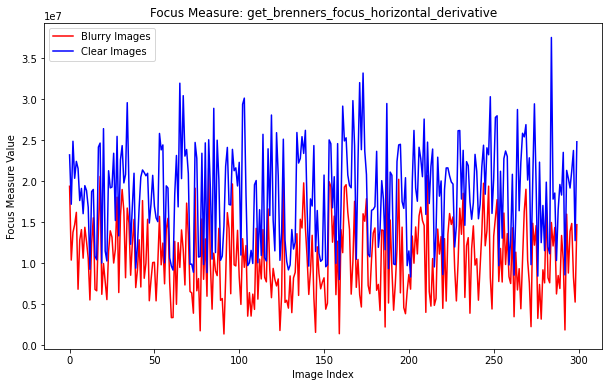

Focus Measure: get_brenners_focus_vert_derivative
   Blurry Images - Mean: 12077206.03
   Clear Images - Mean: 20029785.356666666
   Separation: 7952579.326666666



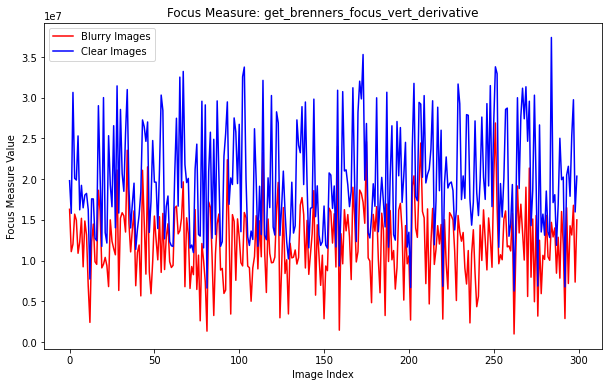

Focus Measure: get_brenners_focus_horizontal_gradient
   Blurry Images - Mean: 16788168.4025
   Clear Images - Mean: 54070488.63333333
   Separation: 37282320.23083334



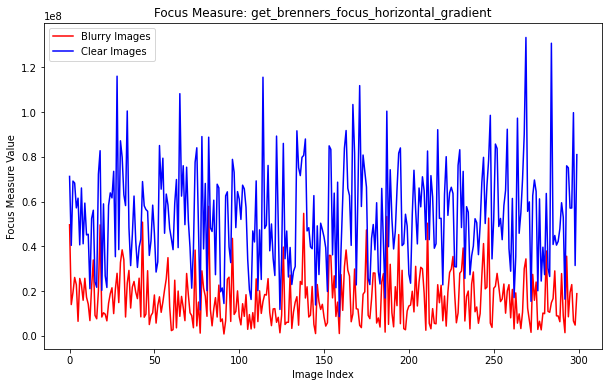

Focus Measure: get_brenners_focus_vert_gradient
   Blurry Images - Mean: 21482787.395833332
   Clear Images - Mean: 55197934.09
   Separation: 33715146.694166675



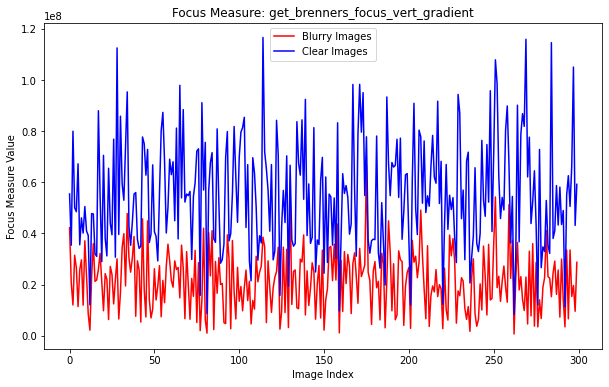

Focus Measure: get_brenners_focus_color
   Blurry Images - Mean: 21097768.413333334
   Clear Images - Mean: 29527667.20888889
   Separation: 8429898.795555554



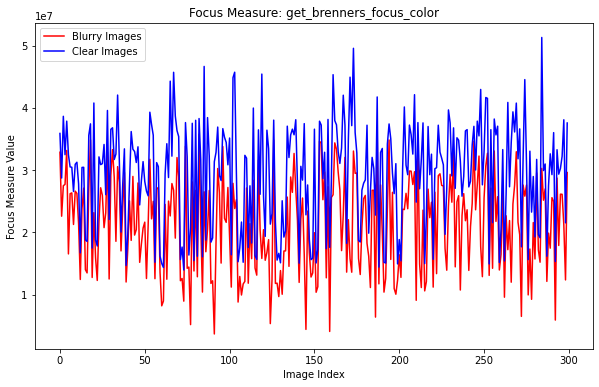

Best focus measure function is get_brenners_focus_horizontal_gradient with separation 37282320.23083334


In [8]:
# Define paths to the blurry and clear images folders
blur_images_folder = "datasets/gopro_deblur/blur_images"
clear_images_folder = "datasets/gopro_deblur/sharp_images"

# List of your 5 focus measure functions (assuming you've implemented them)
focus_functions = [
    get_brenners_focus_horizontal_derivative,
    get_brenners_focus_vert_derivative,
    get_brenners_focus_horizontal_gradient,
    get_brenners_focus_vert_gradient,
    get_brenners_focus_color
]

# Run the comparison experiment
compare_focus_measures(blur_images_folder, clear_images_folder, focus_functions)

### Conclusion
Hopefully by now you've run all the cells and have been able to successfully recreate the experiment. By both visual inspection of the charts, and by comparing separation of focus measure mean's where
 ```separation = abs(clear_mean - blurry_mean)``` 
 its clear that the horizontal gradient is the most effective for this dataset when attempting to best for distinguishing between blurry and clear images. 

This is a incredibly valuable functionality, especially when deploying computer vision solutions where blur or vibration is present. 